## <font color='#7ed6df'>Mount the Google Drvie on the Colab.

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/Data Mining Project
!ls

Mounted at /content/drive
/content/drive/MyDrive/Data Mining Project
 abc.xlsx
 apriori2.xlsx
 apriori.ipynb
 apriori.xlsx
 ARH.xlsx
 basket_analysis.xlsx
'chatbot_rule_complete2 (3).ipynb'
 country_time_freqrank.csv
 DataAnalyst.csv
 Decision_Tree.ipynb
 ECLAT.ipynb
'Entity Recognition in Resumes.json'
 FP-Growth.ipynb
 gender_bias_detector.ipynb
 Groceries.xlsx
'IMDB Dataset.csv'
 kaggle
 KMeans.ipynb
 k-means.xlsx
 KNN.ipynb
 labeled_job_listings.csv
 labeled_job_postings.csv
 mushrooms.csv
 netflix_titles.csv
 oner_env
 OneR.ipynb
 Online_Retail.xlsx
 output.xlsx
 recruitment.csv
 sentimental_analysis.ipynb
 training.1600000.processed.noemoticon.csv
 ZeroR.ipynb


## <font color='#7ed6df'>Install Huggingface Transformers libraries

In [3]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 103.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 57.8 MB/s eta 0:00:00


# <font color='#7ed6df'>Twitter Sentiment Classification 
## <font color='#1aacf0'> Text Classification <br> ​<font color='#206cfa'> Develop a sentiment analysis model using a pre-trained Transformer model (RoBERTa) to classify the sentiment of tweets from the Sentiment140 dataset. </font>


## <font color='#7ed6df'>Import all the necessary libraries for fine-tuning and training Transformer models and evaluating Classification performance

In [4]:
import torch
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## <font color='#7ed6df'>Load Tweet Datasets

In [5]:
# Load dataset
columns = ['target', 'id', 'date', 'flag', 'user', 'text']
data = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1', names=columns)

# <font color='#7ed6df'>Preprocess the dataset

In [6]:
# Preprocess dataset
data['target'] = data['target'].replace(4, 1)  # Replace target value '4' with '1' to represent positive sentiment
data = data.sample(n=1000, random_state=42)  # Select 10,000 random samples
texts = data['text'].tolist()
labels = data['target'].tolist()

# <font color='#7ed6df'>Load the tokenizer form RoBERTa model.

In [7]:
# Load the tokenizer from Roberta to convert the input text into a format that the model can understand.
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Load pre-trained RoBERTa model
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classi

# <font color='#7ed6df'>Train-Validation Split

In [8]:
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.3, random_state=42)

# <font color='#7ed6df'>Fine-tune the RoBERTa model

In [9]:
encoded_train_texts = tokenizer(train_texts, padding=True, truncation=True, return_tensors='pt')
encoded_val_texts = tokenizer(val_texts, padding=True, truncation=True, return_tensors='pt')

train_labels = torch.tensor(train_labels)
val_labels = torch.tensor(val_labels)

train_dataset = TensorDataset(encoded_train_texts['input_ids'], encoded_train_texts['attention_mask'], train_labels)
val_dataset = TensorDataset(encoded_val_texts['input_ids'], encoded_val_texts['attention_mask'], val_labels)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4)

# <font color='#7ed6df'>Set up optimizer and learning rate

In [10]:
optimizer = AdamW(model.parameters(), lr=1e-5)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


# <font color='#7ed6df'>Model training loop to learn patterns in the text data that allow it to differentiate between positive and negative sentiments.

In [11]:
# Training loop
for epoch in range(1):
    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# <font color='#7ed6df'>Model Evaluation and Performance Metrics

In [12]:
# Step 6: Evaluation
predictions = []
model.eval()
with torch.no_grad():
    for batch in val_loader:
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        pred = torch.argmax(logits, dim=1)
        predictions.extend(pred.tolist())

print(classification_report(val_labels, predictions))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80       148
           1       0.85      0.70      0.77       152

    accuracy                           0.79       300
   macro avg       0.80      0.79      0.79       300
weighted avg       0.80      0.79      0.79       300



# <font color='#7ed6df'>Visualize model performance metrics

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

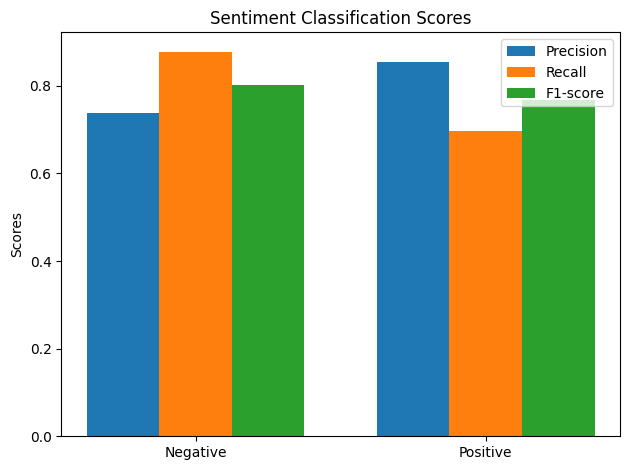

In [14]:
# Calculate precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(val_labels, predictions, average=None)

labels = ['Negative', 'Positive']
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
ax.bar(x - width, precision, width, label='Precision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, f1, width, label='F1-score')

ax.set_ylabel('Scores')
ax.set_title('Sentiment Classification Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()